In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("cs109a_hw2.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science
## Homework 2: kNN and Linear Regression

**Harvard University**<br/>
**Fall 2022**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [ ]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

#### Instructions
- To submit your assignment follow the instructions given in Canvas.
- Plots should be legible and interpretable without having to refer to the code that generated them, including labels for the $x$- and $y$-axes as well as a descriptive title and/or legend when appropriate.
- When asked to interpret a visualization, do not simply describe it (e.g., "the curve has a steep slope up"), but instead explain what you think the plot *means*.
- The use of 'hard-coded' values to try and pass tests rather than solving problems programmatically will not receive credit.
- The use of *extremely* inefficient or error-prone code (e.g., copy-pasting nearly identical commands rather than looping) may result in only partial credit.
- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. Please get course staff approval before importing any additional 3rd party libraries.
- Enable scrolling output on cells with very long output.
- Feel free to add additional code or markdown cells as needed.
- Ensure your code runs top to bottom without error and passes all tests by restarting the kernel and running all cells. This is how the notebook will be evaluated (note that this can take a few minutes).

In [ ]:
# RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

# Import libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

<a id="contents"></a>

## Notebook Contents

- [**PART 1 [60 pts]: Predicting the selling price of cars on CarDekho.com**](#part1)
  - [Part 1 Overview](#part1intro)
  - [Question 1: Exploratory data analysis (EDA) [10 pts]](#part1questions)
  - [Question 2: k-Nearest Neighbors [25 pts]](#part2questions)
  - [Question 3: Simple linear regression [25 pts]](#part3questions)


- [**PART 2 [40 pts]: Analysis of Simulated ASEC Data**](#part2)
  - [Part 2 Overview](#part2intro)
  - [Question 4:   Investigating trends [25 pts]](#part4questions)
  - [Question 5:  Calculate the Gini coefficient [10 pts]](#part5questions)
  - [Question 6:  Critiquing the simulated data [5 pts]](#part6questions)


## About this homework

This assignment is the first in which we'll go through the process of loading a dataset, splitting it into train and test sets, performing some preprocessing, and finally fitting some models and evaluating our results.

We have two different datasets:
- [**PART 1**](#part1) car data from [cardekho.com](https://www.cardekho.com/)
- [**PART 2**](#part2) *simulated* income data created from the [Annual Social and Economic (ASEC) Supplement](https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.2021.html)

Part 1 explores two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method.

Part 2 is focused EDA and visualization.

<a id="part1"></a>
    
# PART 1 [60 pts]: Predicting the selling price of cars on CarDekho.com

[Return to contents](#contents)

<a id="part1intro"></a>

## Overview

[Return to contents](#contents)

According to its website, **CarDekho.com** is India's leading car search venture. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons, as well as videos and pictures of all car brands and models available in India. Each car has a **current selling price**, which is the price for buying a used car on this site, and an **MRP**, which is the retail price of the car. These two prices differ depending on factors such as brand, make year, mileage, condition, etc.  

### Dataset 

The dataset contains 601 used cars and is available as `data/car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a used car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of the car when it was new (in lakhs). 
- **Kms_Driven** - number of kilometers

**NOTE:** 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

### Objective

Using kNN and linear regression we will predict the `Current_Selling_Price` from the other features available in this dataset.

<a id="part1questions"></a>

## <div class='exercise'><b> Question 1: Exploratory data analysis (EDA) [10 pts]</b></div>

[Return to contents](#contents)

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

**Load the dataset, inspect it, and answer the following questions:**

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.1</b></div>

Identify all variables in the dataset. Which ones are quantitative, and which ones are categorical? If you think any variables are categorical, briefly explain why.

_Points:_ 2

quantitative: Current_Selling_Price, MRP, Kms_Driven
categorical: Year
Because make year doesn't have numerical value

In [3]:
# your code here
df = pd.read_csv("data/car_dekho_full.csv")

In [4]:
df.dtypes

Year                       int64
Current_Selling_Price    float64
MRP                      float64
Kms_Driven                 int64
dtype: object

<!-- END QUESTION -->

<div class='exercise'><b>Q1.2</b></div>

What are the means and standard deviations for `Current_Selling_Price` and `MRP`?

Store your results in `mean_csp`, `mean_mrp`, `std_csp`, and `std_mrp` to match the variable names used in the provided print function.

_Points:_ 2

In [285]:
mean_csp = df['Current_Selling_Price'].mean()
mean_mrp = df['MRP'].mean()
std_csp = df['Current_Selling_Price'].std()
std_mrp = df['MRP'].std()

In [286]:
# Be certain to name your variables mean_csp, mean_mrp, std_csp, std_mrp
# to match the variable names used in the provided print function
print(
    "\n"
    f"The mean Current Selling Price is {mean_csp:.4f} lakhs\n"
    f"The mean MRP is {mean_mrp:.4f} lakhs\n"
    f"The Standard Deviation of Current Selling Price is {std_csp:.4f}\n"
    f"The Standard Deviation of MRP is {std_mrp:.4f}"
)


The mean Current Selling Price is 4.3931 lakhs
The mean MRP is 6.9116 lakhs
The Standard Deviation of Current Selling Price is 4.5183
The Standard Deviation of MRP is 6.4801


In [287]:
grader.check("q1.2")

q1.2 results: All test cases passed!

<div class='exercise'><b>Q1.3</b></div>

What is the range of kilometers that the cars have been driven? Store your answer in the variable `km_range`.

**Hint:** 'range' here refers the difference between the highest and lowest recorded kilometers driven.

_Points:_ 2

In [288]:
# your code here
km_range = df['Kms_Driven'].max()-df['Kms_Driven'].min()

In [289]:
# check your result
print(f"the range of kilometers is {km_range:,.2f}")

the range of kilometers is 212,500.00


In [290]:
grader.check("q1.3")

q1.3 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.4</b></div>

The goal in this section is to identify the best feature to use to predict our response, `Current_Selling_Price`. 

- Plot a scatter plot of each feature and our reponse and examine any relationships.
- Which is the predictor that seems to best predict `Current_Selling_Price`? Provide an interpretation of the plots that justifies your choice.

_Points:_ 4

MRP is the best feature to predecit the response, because it has positive relationship with current selling price

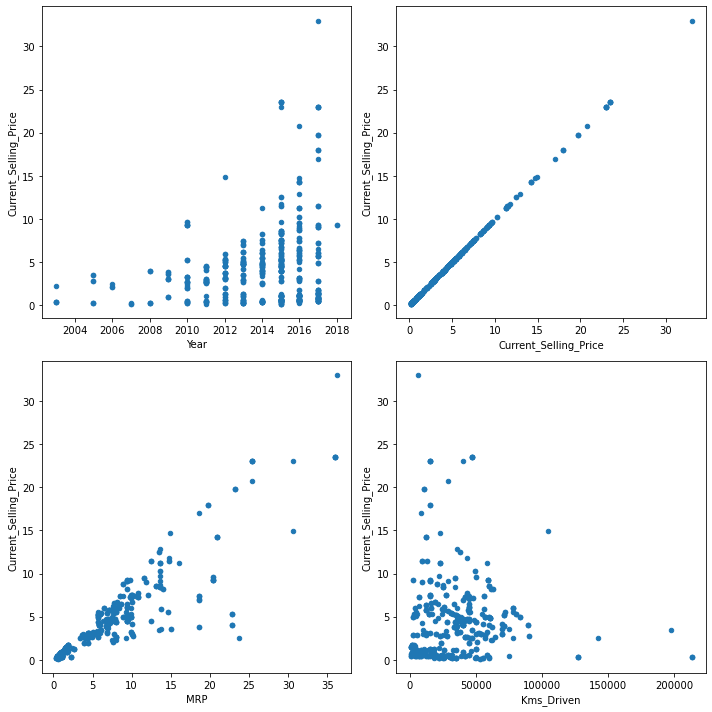

In [291]:
cols = df.columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = axes.ravel()
for c, ax in zip(cols, axes):
    df.plot(x=c, y='Current_Selling_Price', kind='scatter', ax=ax)
plt.tight_layout()

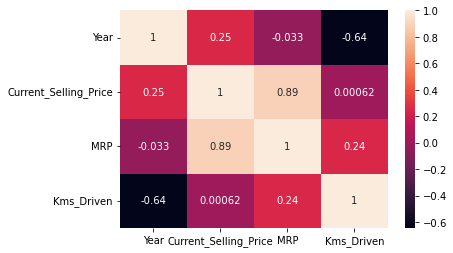

In [292]:
sns.heatmap(df.corr(),annot=True);

<!-- END QUESTION -->

<a id="part2questions"></a>

## <div class='exercise'><b> Question 2:   k-Nearest Neighbors [25 pts]</b></div>

[Return to contents](#contents)

We will begin our modeling with k-Nearest Neighbors (kNN) regression, using `sklearn` for both preprocessing and model fitting.

<div class='exercise'><b>Q2.1</b></div>

Split the dataset into a train and test set with 75% training data and 25% testing data, using argument `random_state = 109`. The resulting splits should be stored in the variables `X_train`, `X_test`, `y_train`, `y_test`.

_Points:_ 2

In [443]:
X = df[['MRP']]
y = df['Current_Selling_Price']
type(X), type(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=109)
X_train.shape, x_test.shape, y_train.shape, y_test.shape

((450, 1), (151, 1), (450,), (151,))

In [444]:
# plt.scatter(X_train, y_train, alpha=0.45, label='train')
# plt.scatter(X_test, y_test, alpha=0.45, label='test')
# plt.xlabel('MRP')
# plt.ylabel('Current_Selling_Price')
# plt.title('Car Ddekho')
# plt.legend();

In [445]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<div class='exercise'><b>Q2.2</b></div>

Now, we will fit several kNN regression models for various values of $k$ to identify the best parameterization.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.2.1</b></div>

For each $k$ in $k \in [1,2,3,5,7,10,50,100]$, fit a k-NN regression model to the training data with response `Current_Selling_Price` and the predictor `MRP`. 
  - For each $k$, make a plot of reponse vs. predictor (8 plots in total, arranged in a 4×2 grid). 
  - Each of your 8 plots should clearly show (a) the training data and the testing data in different colors, (b) the model prediction, and (c) title, legend, and axis labels.
  - **NOTE:** Feel free to use the `plt.subplots()` code we provide to specify your 4x2 grid, unless you first try that and decide that you have a clearer, cleaner way of accomplishing this task. 

_Points:_ 7

In [446]:
# fig, axs = plt.subplots(4,2, figsize=(12, 14))
# fig.subplots_adjust(hspace = .5, wspace=.3)
# your code here

In [447]:
len(X), len(X_train), len(X_test)

(601, 450, 151)

In [448]:
ks = [1,2,3,5,7,10,50,100]
# fig, ax = plt.subplots(figsize=(10,6))
all_preds = []

for k_value in ks:
    preds = KNeighborsRegressor(n_neighbors=int(k_value)).fit(X_train,y_train).predict(X_test)
    all_preds.append(preds)

/Users/karenkuo/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/Users/karenkuo/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/Users/karenkuo/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/Users/karenkuo/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/Users/karenkuo/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


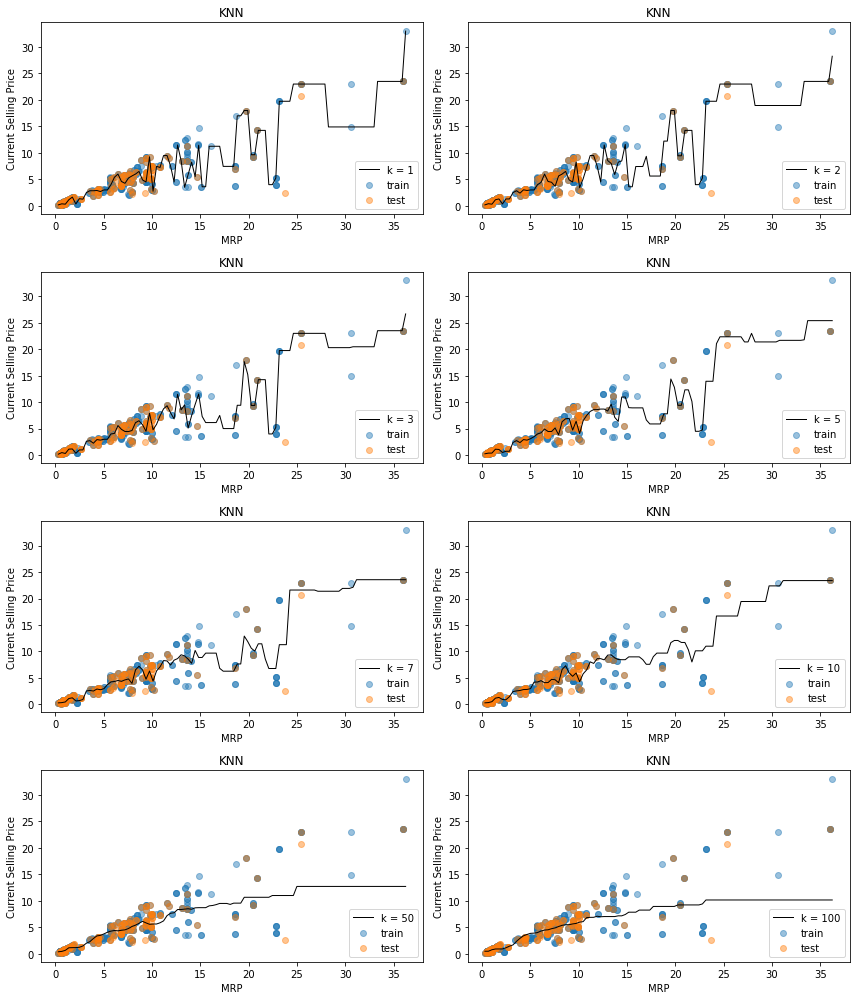

In [449]:
fig, axs = plt.subplots(4,2, figsize=(12, 14))
axs = axs.ravel()


# Loop over all the k values
for k_value, ax in zip(ks, axs):
    
    # Creating a kNN Regression model 
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    
    # Fitting the regression model on the training data 
    model.fit(X_train,y_train)
    
    # Use the trained model to predict on the test data 
    y_pred = model.predict(X_test)
    
    # Helper code to plot the data along with the model predictions
    colors = ['green','r','b']
    xvals = np.linspace(X.min(),X.max(),100)
    ypreds = model.predict(xvals)
    ax.plot(xvals, ypreds,'-',label = f'k = {int(k_value)}',linewidth=1, c='black')
    ax.scatter(X_train, y_train, alpha=0.45, label='train')
    ax.scatter(X_test, y_test, alpha=0.45, label='test')
    ax.legend(loc='lower right',fontsize=10)
    # ax.plot(X_train.values, y_train,'x',label='train',color='k')
    ax.set_xlabel('MRP',fontsize=10)
    ax.set_ylabel('Current Selling Price',fontsize=10)
    ax.set_title('KNN')
    plt.tight_layout()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.2.2</b></div>

Plot the training and test $MSE$ values as a function of $k$ (1 plot in total).

_Points:_ 4

In [467]:
def get_metrics(model, name: str) -> dict:
    d = {}
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    d['name'] = name
    d['train_mse'] = mean_squared_error(y_train, y_hat_train)
    d['test_mse'] = mean_squared_error(y_test, y_hat_test)
    d['r2_train'] = r2_score(y_train, y_hat_train)
    d['r2_test'] = r2_score(y_test, y_hat_test)
    return d

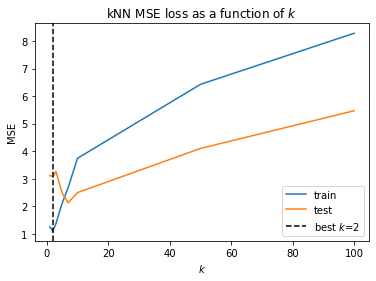

In [468]:
# your code here
train_mses = []
test_mses = []

for k in ks:
    cur_knn = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    cur_metrics = get_metrics(cur_knn, 'cur_knn')
    # train_mses.append(mean_squared_error(y_train, cur_knn.predictict(x_train)))
    train_mses.append(cur_metrics['train_mse'])
    test_mses.append(cur_metrics['test_mse'])
    
best_idx = np.argmin(train_mses)
best_k = ks[best_idx]

plt.plot(k_list, train_mses, label='train')
plt.plot(k_list, test_mses, label='test')
plt.axvline(best_k, c='k', ls='--', label=rf'best $k$={best_k}')
plt.xlabel(r'$k$')
plt.ylabel('MSE')
plt.title('kNN MSE loss as a function of $k$')
plt.legend();

<!-- END QUESTION -->

<div class='exercise'><b>Q2.2.3</b></div>

Find the best model based on the test $MSE$ values. Store the best $k$-value in `best_k` and the best test $MSE$ in `best_mse`.

_Points:_ 2

In [452]:
# your code here
best_k = ks[best_idx]
best_mse = np.argmin(test_mses)

In [453]:
print(
    f"The best k value is {best_k}. This corresponds to the "
    f"lowest test MSE of {best_mse:.3f}."
)

The best k value is 2. This corresponds to the lowest test MSE of 4.000.


In [454]:
grader.check("q2.2.3")

q2.2.3 results: All test cases passed!

<div class='exercise'><b>Q2.2.4</b></div>

Evaluate and report the $R^2$ of the best model. Save the $R^2$ of the best model in `best_r2`.

_Points:_ 2

In [455]:
knn = KNeighborsRegressor(n_neighbors=best_k).fit(X_train, y_train)

In [456]:
# your code here
best_r2 = get_metrics(knn, 'Linear Regression')['r2_test']
best_r2

0.8094594192601463

In [457]:
print(
    f"The R-squared score evaluated on the test set for the best model "
    f"with k={best_k} is {best_r2:.4f}."
)

The R-squared score evaluated on the test set for the best model with k=2 is 0.8095.


In [458]:
grader.check("q2.2.4")

q2.2.4 results: All test cases passed!

<div class='exercise'><b>Q2.3</b></div>

In this section you will discuss your results by answering the following questions.  You should answer the questions directly in the provided markdown cells of your notebook.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.3.1</b></div>

How does the value of $k$ affect the fitted model?

_Points:_ 2

low values of k the prediction line is complex and jagged. It smooths at as k increase because more neighbors are considered for each prediction

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.3.2</b></div>

If $n$ is the number of observations in the training set, what can you say about a kNN regression model that uses $k = n$?  

_Points:_ 2

no, k is hyper parameter. If we set k=n, the model will spit out only the mean of all values as it is taking the all of the observation at each attempt. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.3.3</b></div>

Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.

_Points:_ 2

similar trend but different scale. k influence traing to a larger extent than test, but both time, increasing k will increase MSE.

<!-- END QUESTION -->

<div class='exercise'><b>Q2.3.4</b></div>

If you were to change the `random_state` argument to `train_test_split` above and re-run the code, do you think would select the same model? If not, why?

_Points:_ 2

No. Because'random_state'sets a seed to the random generator, so that your train-test splits are always deterministic. If you don't set a seed, it is different each time.

<a id="part3questions"></a>

## <div class='exercise'><b>Question 3:  Simple linear regression [25 pts]</b></div>

[Return to contents](#contents)

<div class='exercise'><b>Q3.1</b></div>

We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables you used in the kNN model. You will also use the same 75% training and 25% testing split of the data, which was created using `random_state = 109`.

<div class='exercise'><b>Q3.1.1</b></div>

Fit a linear regression model. Name your model `linreg`.

_Points:_ 6

In [459]:
# your code here
# Instantiate a LinearRegression class object and fit with train data
linreg = LinearRegression().fit(X_train, y_train)

In [460]:
grader.check("q3.1.1")

q3.1.1 results: All test cases passed!

<div class='exercise'><b>Q3.1.2</b></div>

Report the slope and intercept values for the fitted linear model. Name your variables `slope` and `intercept`.

_Points:_ 4

In [464]:
# your code here
slope = float(linreg.coef_)
intercept = float(linreg.intercept_)

In [465]:
print(
    f"Intercept of the fitted linear model\t\t{slope:.4f}\n"
    f"Slope of the fitted linear model\t{intercept:.4f}"
)

Intercept of the fitted linear model		0.6157
Slope of the fitted linear model	0.1124


In [ ]:
grader.check("q3.1.2")

<div class='exercise'><b>Q3.1.3</b></div>

Report the $MSE$ for the training and test sets and the $R^2$ for the test set. Name your variables `lin_train_mse`, `lin_test_mse`, and `lin_test_r2`.

_Points:_ 4

In [470]:
# your code here 
#Compute the MSE of the model
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


lin_train_mse = mean_squared_error(y_train, y_hat_train)
lin_test_mse = mean_squared_error(y_test, y_hat_test)
#Compute the R-squared of the model
lin_test_r2 = r2_score(y_test, y_hat_test)

In [472]:
print("Linear regression model results:\n")
print(
    "\tTrain MSE\t{:.4f}\n"
    "\tTest MSE\t{:.4f}\n".format(
        lin_train_mse,
        lin_test_mse,
    )
)

print(f"\tTest R-squared\t{lin_test_r2:.4f}")

Linear regression model results:

	Train MSE	4.7133
	Test MSE	3.1362

	Test R-squared	0.8053


In [473]:
grader.check("q3.1.3")

q3.1.3 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.1.4</b></div>

Plot the **residuals**, $e = y - \hat{y}$, of the model on the **training** set as a function of the **response** variable. Draw a horizontal line denoting the zero residual value on the $y$-axis.

_Points:_ 5

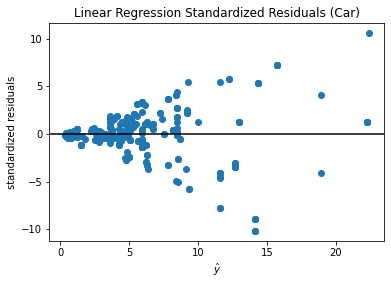

In [479]:
# your code here 
resids = y_train - y_hat_train
plt.scatter(y_hat_train, resids)
plt.axhline(0, c='k')
plt.ylabel('standardized residuals')
plt.title('Linear Regression Standardized Residuals (Car)')
plt.xlabel('$\hat{y}$');

<!-- END QUESTION -->

<div class='exercise'><b>Q3.2</b></div>
Answer the following questions about your results:

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2.1</b></div>

How does the test $MSE$ score compare with the best test $MSE$ value obtained with kNN regression? 

_Points:_ 2

KNN performs slightly worse than linear regression when the relationship is linear, but much better than linear regression for non-linear situations. Since the current relationship is linear, so the performance is similar. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2.2</b></div>

What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?

_Points:_ 2

If the sign is +, the predictor and the response are positively related, meaning the predictor increases and reponse increases;
if the sign is -, the predictor and the response are negatively related, meaning the predictor increases and reponse decreases. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2.3</b></div>

Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.

_Points:_ 2

If the residual is patterned, meaning the redictor and response may not be linearly related; if the residual is noised with scattered(high variance), meaning the quality of the model is not as good as the one with low variance.

<!-- END QUESTION -->

<a id="part2"></a>
    
# PART 2 [40 pts]: Analysis of 2021 US Annual Social and Economic (ASEC) Supplement

[Return to contents](#contents)

<a id="part2intro"></a>

## Overview

[Return to contents](#contents)

In this part we analyze *simulated* income data from the publically available 2021 US Annual Social and Economic (ASEC) Supplement (https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.2021.html), provided by the US Census Bureau. The Current Population Survey (CPS) has been conducted monthly for over 50 years. Currently, about 54,000 households are interviewed monthly, scientifically selected on the basis of area of residence to represent the nation as a whole, individual states, and other specified areas. 

### Dataset

The simulated data can be found in `data/census_data.csv`.

The number of features have been greatly reduced from the original dataset. You can see the description of the original dataset in the [ASEC data dictionary](https://www2.census.gov/programs-surveys/cps/datasets/2021/march/asec2021_ddl_pub_full.pdf).

In addition to subsetting the features, other preprocessing steps have been taken. For example, some categorical variables have had their number of unique values reduced. 

We refer to the data as *simulated* because sampling was used to turn what was originally an ordinal response variable (42 income brackets) into something more continous.

Considering this, the results of your analysis should be viewed skeptically. You can view the the preprocessing steps taken to create the simplified, simulated data in `data/preprocessing.ipynb`.

**NOTE:** Variables have been renamed for easier interpretation. You can find the original variable names in the preprocessing notebook. It will be these original variable names that appear in the data dictionary linked above.

### Features
- **age** - Age of person 
- **hourly_pay** - Hourly salary of person (-1 if person is not payed by the hour)
- **hours_per_week** - Number of hours usually worked per week
- **weeks_worked** - Number of weeks worked per year

- **sex** - {'Female': 0,'Male': 1} 
- **marital_status** - {'married':0,'widowed':1,'Divorced':2, 'Separated':3,'Never married':4}
- **military_service** - {'has not served in the US armed forces':0,'has served in the US armed forces':1}
- **student_status** - {'Not currently studying':0,'Enrolled full-time':1, 'Enrolled part-time':1}
- **education** - {'Not finished high school': 0, 'High school': 1, 'Associate degree': 2, 'Bachelor\'s': 3, ,'Master\'s': 4,'Professional school degree': 5', Doctorate': 6}

- **race** - {'White': 0, 'Black': 1, 'American Indian, Alaskan Native only (AI)': 2, 'Asian': 3, ,'Hawaiian, Pacific Islander (HP)': 4,'White-Black': 5', 'White-AI': 6, 'White-Asian': 7, 'White-HP': 8, 'Black-AI': 9, 'Black-Asian': 10, 'Black-HP': 11, 'AI-Asian': 12, 'AI-HP': 13, 'Asian-HP': 14, 'other race combinations': 15}

- **industry** - Industry that the person is working in {'Other': 0, 'Agriculture, forestry, fishing, hunting': 1, 'Mining': 2, 'Construction': 3, ,'Manufacturing': 4,'Wholesale and retail trade': 5','Transportation and utilities': 6, 'Information': 7, 'Financial activities': 8, 'Professional and business services': 9, 'Education and health services': 10, 'Leisure and hospitality': 11, 'Other services': 12, 'Public administration': 13, 'Armed Forces': 14}

- **occupation** - Occupation of person {'Other': 0, 'Management, business, and financial occ.': 1, 'Professional and related occ.': 2, 'Service occ.': 3, ,'Sales and related occ.': 4,'Office and administrative support occ.': 5','Farming, fishing and forestry': 6, 'Construction and extraction occ.': 7, 'Installation, maintenance and repair occ.': 8, 'Production occ.': 9, 'Transportation and material moving occ.': 10, 'Armed Forces': 11}


- **income** - Annual income in dollars

<a id="part4questions"></a>

## <div class='exercise'><b>Question 4: Investigating trends [25 pts]</b></div>

[Return to contents](#contents)

Below we'll answer questions about potential trends in the data with the help of plots and simple statistics.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.1</b></div>

Is there a disparity in income of participants by gender? Consider using a log scale or another technique when plotting to communicate findings more clearly.

_Points:_ 3

Yes, male has higher income. 

In [32]:
census = pd.read_csv('data/census_data.csv')
census.head()

,Unnamed: 0,age,weeks_worked,hours_per_week,hourly_pay,student_status,education,marital_status,sex,military_service,race,industry,occupation,is_paid_by_hour,person_record,income
0,0,56,0,0,-1,0,1,0,0,0,0,0,0,0,2,1528.04
1,1,57,26,40,-1,0,1,0,1,0,0,3,7,0,2,13728.07
2,2,78,0,0,-1,0,1,1,0,0,0,0,0,0,2,14247.51
3,3,65,52,40,-1,0,3,0,0,0,0,10,2,2,2,45486.23
4,4,66,49,40,-1,0,1,0,1,0,0,6,10,2,2,34436.61


([<matplotlib.axis.XTick at 0x7fe9589f77f0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

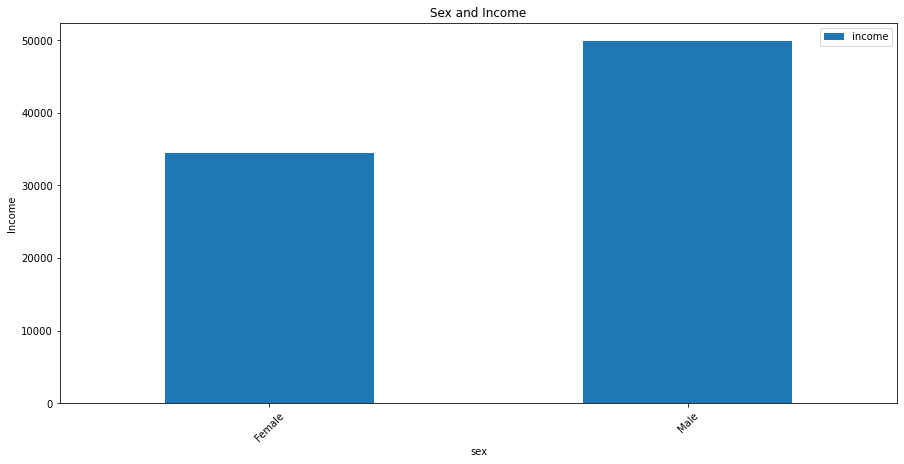

In [58]:
sex = {'Female': 0,'Male': 1}
census.groupby(['sex']).agg({'income': 'mean'})
census_occu=census.groupby(['sex']).agg({'income': 'mean'})
census_occu.plot(kind='bar',figsize=(15, 7))
plt.title('Sex and Income')
plt.ylabel('Income')
plt.xticks(range(2), sex.keys(),rotation = 45)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.2</b></div>

Is there a relationship between income and the "occupation" variable? 

_Points:_ 3

Yes, there is a relationship between income and occupation. Depending on the type of jobs, the income levels are different. For instance, 'Professional and related occ.' and 'Service occ.' have higher income compared to other occupation. 

In [48]:
occupation = {'Other': 0, 'Management, business, and financial occ.': 1, 
              'Professional and related occ.': 2, 'Service occ.': 3,
              'Sales and related occ.': 4,'Office and administrative support occ.': 5,
              'Farming, fishing and forestry': 6, 'Construction and extraction occ.': 7, 
              'Installation, maintenance and repair occ.': 8, 'Production occ.': 9, 
              'Transportation and material moving occ.': 10, 'Armed Forces': 11}

([<matplotlib.axis.XTick at 0x7fe9597222e0>,
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Management, business, and financial occ.'),
  Text(2, 0, 'Professional and related occ.'),
  Text(3, 0, 'Service occ.'),
  Text(4, 0, 'Sales and related occ.'),
  Text(5, 0, 'Office and administrative support occ.'),
  Text(6, 0, 'Farming, fishing and forestry'),
  Text(7, 0, 'Construction and extraction occ.'),
  Text(8, 0, 'Installation, maintenance and repair occ.'),
  Text(9, 0, 'Production occ.'),
  Text(10, 0, 'Transportation and material moving occ.'),
  Text(11, 0, 'Armed Forces')])

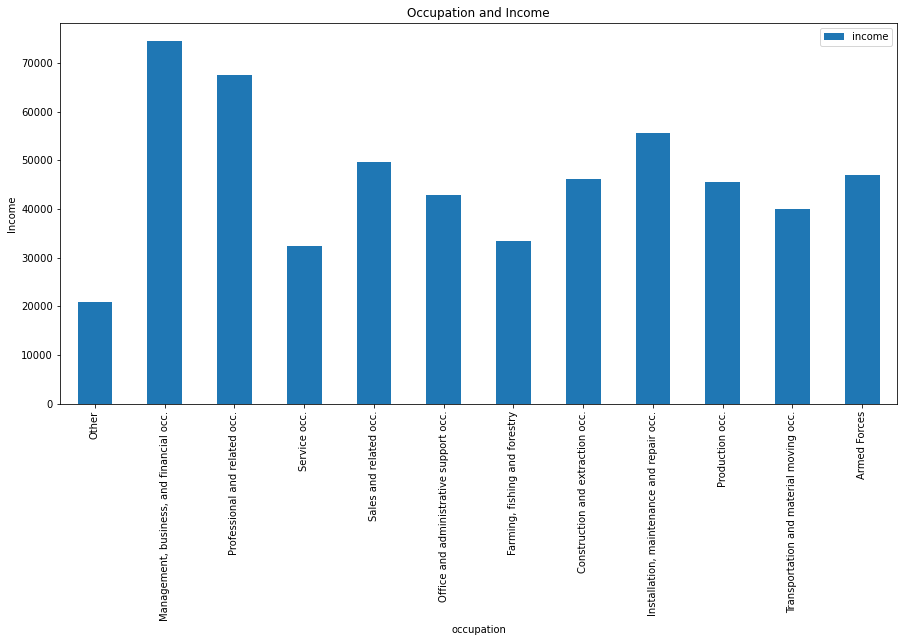

In [79]:
census_occu=census.groupby(['occupation']).agg({'income': 'mean'})
census_occu.plot(kind='bar',figsize=(15, 7))
plt.title('Occupation and Income')
plt.ylabel('Income')
plt.xticks(range(len(occupation)), occupation.keys())

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.3</b></div>

Let's investigate a few questions about education and income:
- Is there a relationship between income and education level? 

- Is this trend similar across both genders in the dataset? 

- Is it possible to consider education level as an ordinal variable? For instance, consider whether retaining this ordering as in the dataset might be preferable to education level complexion as a categorical variable lacking order. 

_Points:_ 4

1. Based on the graph between income and education level, we can see that the higher the education level, in general the higher the income.
2. Based on the income and education level between genderes, we can see that the trend is smilar in both genders. 
3. Yes. We can consider education level as ordinal variable, because there is a clear ordering of the categories we can see similar trends in differents situations.

In [60]:
education = {'Not finished high school': 0, 'High school': 1, 
             'Associate degree': 2, 'Bachelors': 3 ,'Masters': 4,
             'Professional school degree': 5, 'Doctorate': 6}

([<matplotlib.axis.XTick at 0x7fe9911231c0>,
 [Text(0, 0, 'Not finished high school'),
  Text(1, 0, 'High school'),
  Text(2, 0, 'Associate degree'),
  Text(3, 0, 'Bachelors'),
  Text(4, 0, 'Masters'),
  Text(5, 0, 'Professional school degree'),
  Text(6, 0, 'Doctorate')])

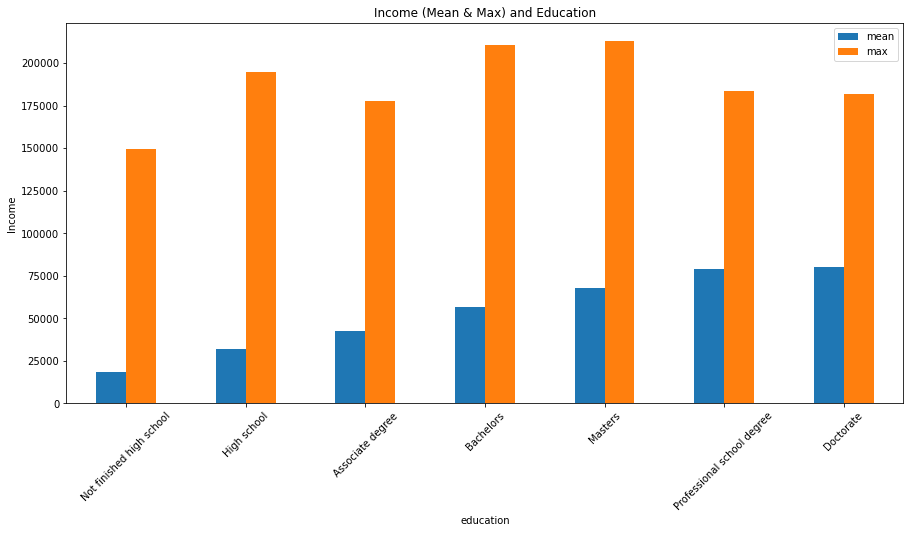

In [62]:
# your code here
census_occu=census.groupby(['education']).income.agg(['mean','max'])
census_occu.plot(kind='bar',figsize=(15, 7))
plt.title('Income (Mean & Max) and Education')
plt.ylabel('Income')
plt.xticks(range(len(education)), education.keys(),rotation = 45)

([<matplotlib.axis.XTick at 0x7fe99115abe0>,
 [Text(0, 0, 'Not finished high school'),
  Text(1, 0, 'High school'),
  Text(2, 0, 'Associate degree'),
  Text(3, 0, 'Bachelors'),
  Text(4, 0, 'Masters'),
  Text(5, 0, 'Professional school degree'),
  Text(6, 0, 'Doctorate')])

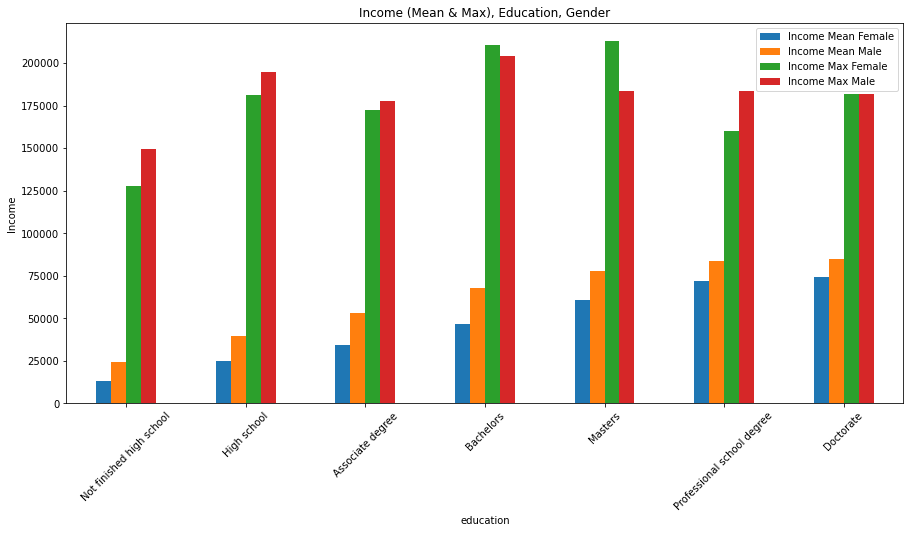

In [65]:
census_occu=census.groupby(['education','sex']).income.agg(['mean','max']).unstack()
census_occu.plot(kind='bar',figsize=(15, 7))
plt.title('Income (Mean & Max), Education, Gender')
plt.ylabel('Income')
plt.legend(['Income Mean Female','Income Mean Male', 'Income Max Female','Income Max Male', 'Income Min Female','Income Min Male'])
plt.xticks(range(len(education)), education.keys(),rotation = 45)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.4</b></div>

Is there a discernable trend in the incomes of participants from different industries?

_Points:_ 3

No, there is no discernable trend, it is flutuating. Based on the graph, we can see 2:Mining and 13:Public Administration are particularly high. 

In [67]:
industry = {'Other': 0, 'Agriculture, forestry, fishing, hunting': 1, 
            'Mining': 2, 'Construction': 3, 'Manufacturing': 4,
            'Wholesale and retail trade': 5,'Transportation and utilities': 6, 
            'Information': 7, 'Financial activities': 8, 'Professional and business services': 9, 
            'Education and health services': 10, 'Leisure and hospitality': 11, 'Other services': 12, 
            'Public administration': 13, 'Armed Forces': 14}

([<matplotlib.axis.XTick at 0x7fe976efcee0>,
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Agriculture, forestry, fishing, hunting'),
  Text(2, 0, 'Mining'),
  Text(3, 0, 'Construction'),
  Text(4, 0, 'Manufacturing'),
  Text(5, 0, 'Wholesale and retail trade'),
  Text(6, 0, 'Transportation and utilities'),
  Text(7, 0, 'Information'),
  Text(8, 0, 'Financial activities'),
  Text(9, 0, 'Professional and business services'),
  Text(10, 0, 'Education and health services'),
  Text(11, 0, 'Leisure and hospitality'),
  Text(12, 0, 'Other services'),
  Text(13, 0, 'Public administration'),
  Text(14, 0, 'Armed Forces')])

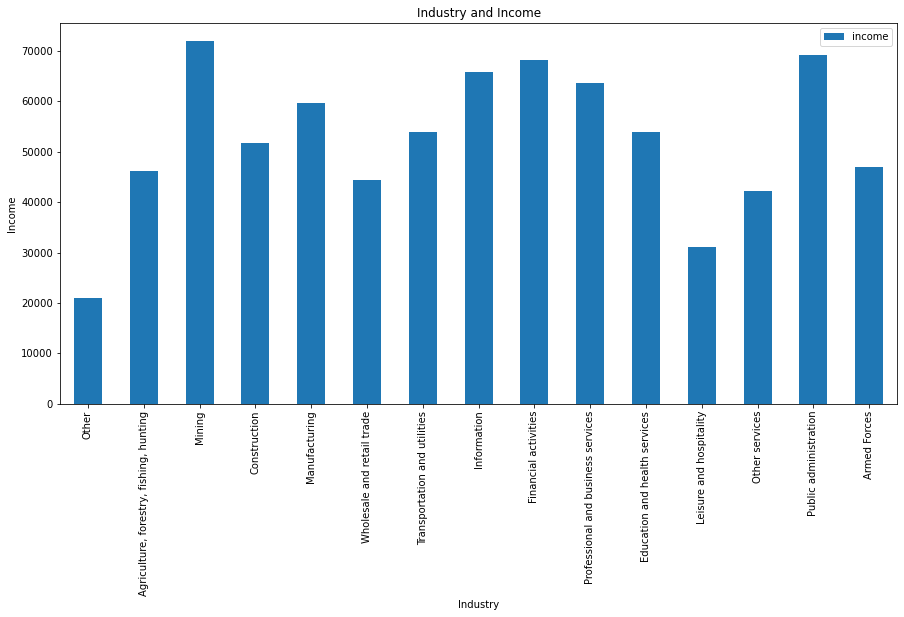

In [71]:
census_industry=census.groupby(['industry']).agg({'income': 'mean'})
census_industry.plot(kind='bar',figsize=(15, 7))
plt.title('Industry and Income')
plt.ylabel('Income')
plt.xlabel('Industry')
plt.xticks(range(len(industry)), industry.keys())

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.5</b></div>

Is there a clear trend between age and income?

_Points:_ 3

Yes. The highest average income are around the middle ages (between 40-50 year old), and the decrease towards both tails. 

Text(0, 0.5, 'Income')

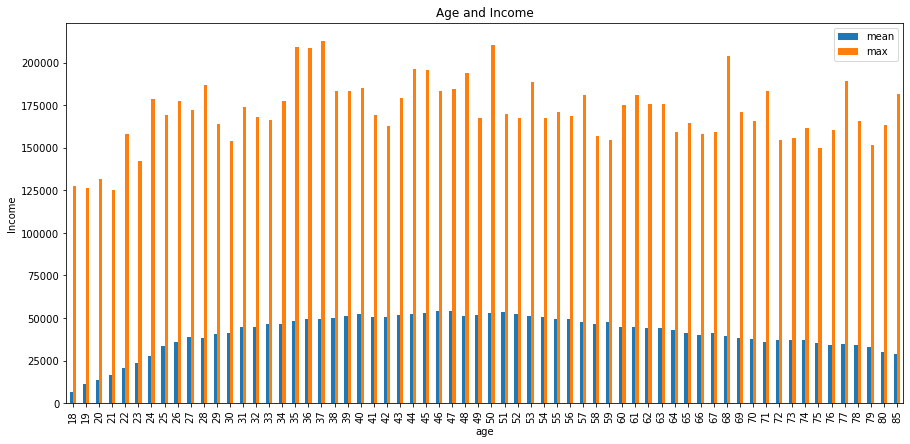

In [43]:
# your code here
census_occu=census.groupby(['age']).income.agg(['mean','max'])
census_occu.plot(kind='bar',figsize=(15, 7))
plt.title('Age and Income')
plt.ylabel('Income')

([<matplotlib.axis.XTick at 0x7fe984eab2e0>,
 [Text(0, 0, '10-20'),
  Text(1, 0, '20-30'),
  Text(2, 0, '30-40'),
  Text(3, 0, '40-50'),
  Text(4, 0, '50-60'),
  Text(5, 0, '60-70'),
  Text(6, 0, '70-80'),
  Text(7, 0, '80-90')])

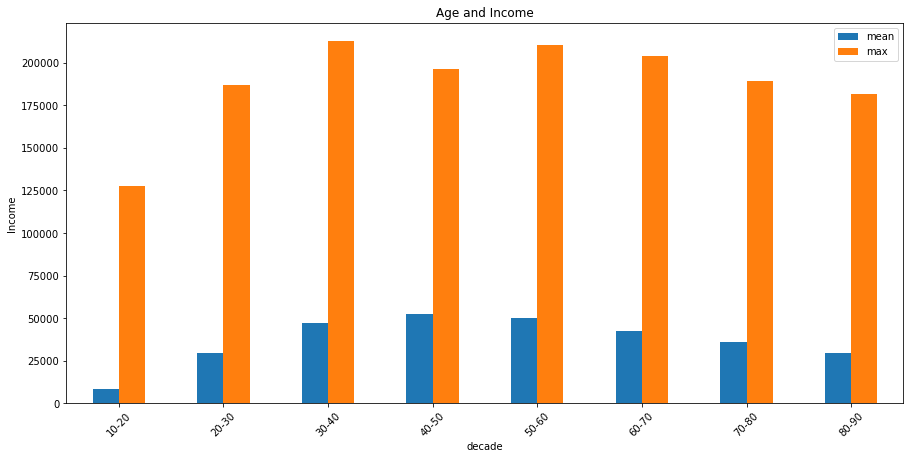

In [72]:
# your code here
census['decade']= census['age']//10
census_occu=census.groupby(['decade']).income.agg(['mean','max'])
census_occu.plot(kind='bar',figsize=(15, 7))
plt.title('Age and Income')
plt.ylabel('Income')
plt.xticks(range(8),['10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90'],rotation = 45)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.6</b></div>

Do any of the quantitative attributes show a clear relationship with income? If so, are these relationships linear or non-linear?

_Points:_ 3

yes, there is not a monotonic correlation between 'age'and income as can be seen from the scatter plot, however seeing from the coeffiecnt, there is some linear relation between these two, 'hourly pay' and ''hours_per_week','weeks_worked' are related to income, since intuitively for people who get hourly payment income=hourly pay * hours_per_week * week_worked.

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(census, annot=True,ax=ax)

<AxesSubplot:>

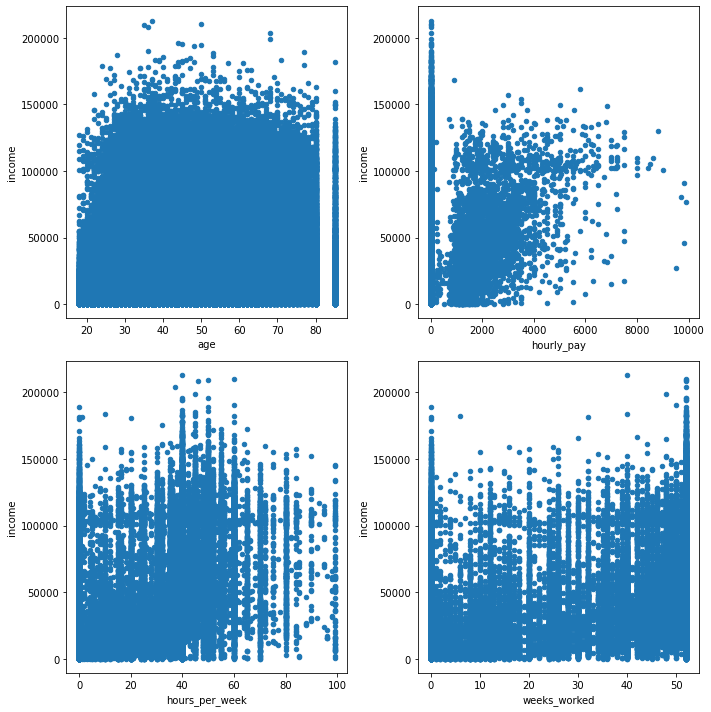

In [73]:
cols=['age','hourly_pay','hours_per_week','weeks_worked']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = axes.ravel()
for c, ax in zip(cols, axes):
    census.plot(x=c, y='income', kind='scatter', ax=ax)
plt.tight_layout()

In [24]:
correlation_census = census.corr()
print (correlation_census)

                  Unnamed: 0    age  weeks_worked  hours_per_week  hourly_pay  \
Unnamed: 0             1.000 -0.037        -0.018          -0.017  -3.059e-03   
age                   -0.037  1.000        -0.314          -0.323  -5.849e-02   
weeks_worked          -0.018 -0.314         1.000           0.861   1.421e-01   
hours_per_week        -0.017 -0.323         0.861           1.000   1.198e-01   
hourly_pay            -0.003 -0.058         0.142           0.120   1.000e+00   
student_status         0.015 -0.332        -0.064          -0.077   2.053e-04   
education             -0.059  0.044         0.210           0.196  -5.909e-03   
marital_status         0.004 -0.422        -0.030          -0.019   1.965e-02   
sex                    0.006 -0.029         0.125           0.172   1.197e-02   
military_service       0.003  0.207        -0.080          -0.074  -9.384e-03   
race                   0.120 -0.052        -0.013          -0.006  -9.893e-03   
industry              -0.011

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.7</b></div>

What is the relationship between income and the different values for `marital_status` in the dataset?

_Points:_ 3

Based on the graph, widowed, separated, and never married status have relatively less income compared to married and divorced. 

([<matplotlib.axis.XTick at 0x7fe982bb9130>,
 [Text(0, 0, 'married'),
  Text(1, 0, 'widowed'),
  Text(2, 0, 'Divorced'),
  Text(3, 0, 'Separated'),
  Text(4, 0, 'Never married')])

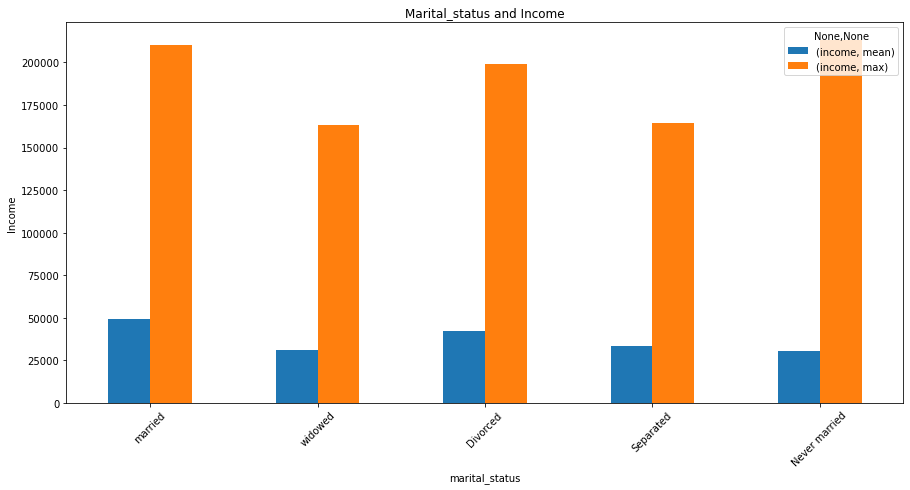

In [75]:
marital_status = {'married':0,'widowed':1,'Divorced':2, 'Separated':3,'Never married':4}
census_martial=census.groupby(['marital_status']).agg({'income': ['mean','max']})
census_martial.plot(kind='bar',figsize=(15, 7))
plt.title('Marital_status and Income')
plt.ylabel('Income')
plt.xticks(range(len(marital_status)), marital_status.keys(),rotation=45)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.8</b></div>

What is the average effect of the `military_service` variable on income?

_Points:_ 3

The average income for people who has not served in the US armed forces is lower than those who has, and 

([<matplotlib.axis.XTick at 0x7fe991f6dd00>,
 [Text(0, 0, 'has not served in the US armed forces'),
  Text(1, 0, 'has served in the US armed forces')])

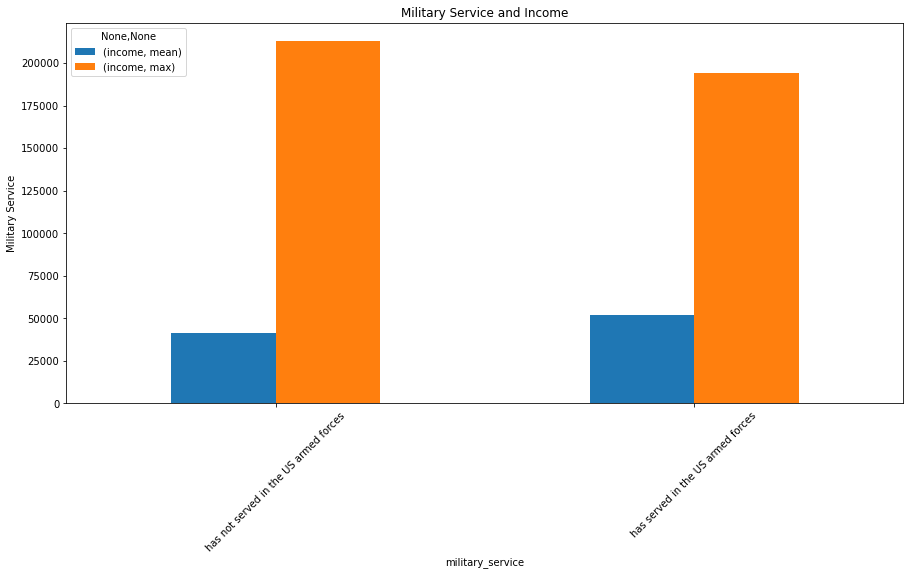

In [76]:
military_service = {'has not served in the US armed forces':0,'has served in the US armed forces':1}
census_military=census.groupby(['military_service']).agg({'income': ['mean','max']})
census_military.plot(kind='bar',figsize=(15, 7))
plt.title('Military Service and Income')
plt.ylabel('Income')
plt.ylabel('Military Service')
plt.xticks(range(len(military_service)), military_service.keys(),rotation=45)

<!-- END QUESTION -->

<a id="part5questions"></a>

## <div class='exercise'><b>Question 5:  Calculate the Gini coefficient [10 pts]</b></div>

[Return to contents](#contents)


**Gini coefficients are often used to quantify income inequality.** For an introductory overview of the Gini coefficient, its derivation, and its uses, you can [read more about it here](https://en.wikipedia.org/wiki/Gini_coefficient). That article also provides [a useful graphical representation](https://en.wikipedia.org/wiki/File:Economics_Gini_coefficient2.svg) of the Gini coefficient to better understand how it measures inequality. 

The Gini coefficient is defined by the formula:

$$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini coefficient of $G=0$ implies perfect income equality, whereas a Gini coefficient close to $G=1$ implies a concentration of wealth among the richest few.

<div class='exercise'><b>Q5.1</b></div>

Based on the above formula, calculate and report the Gini coefficient for the income of those people in the the provided ASEC dataset. Store the result in `gini_coef`.

- **NOTE:** For algorithmic simplicity and consistency, you can rank income values for all observations, keeping duplicate values in your sorted array. Therefore, you will likely have sorted income values $x_i$ similar to `[417, 417, 417, ..., 250000, 250000, 250000]` with corresponding rank indices $i$ similar to `[1, 2, 3, ..., 12353, 12354, 12355]`. Nothing more sophisticated than that is required for dealing with ties (i.e. duplicates) in your sorted income values for Question 5.1.

_Points:_ 7

In [77]:
n = len(census)
census_sorted = census.sort_values(by=['income'], ascending=True)
census_sorted.reset_index(inplace=True, drop=True)

sum_a = 0
sum_ab = 0
for i in range(n):
    sum_a += (2*i - n -1)*census_sorted['income'][i]
    sum_ab += census_sorted['income'][i]
sum_ab = sum_ab * n

gini_coef = sum_a/sum_ab
gini_coef

0.4728274712321445

In [78]:
# Print resulting Gini coefficient
print(
    f"The Gini Index for this dataset is {gini_coef:.3f}")

The Gini Index for this dataset is 0.473


In [44]:
grader.check("q5.1")

q5.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.2</b></div>

According to the [World Bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the country with the largest Gini coefficient is South Africa, ranked 1st at $0.63$, while the lowest is the Slovak Republic, ranked 162nd at $0.232$. The United States is ranked 46th on the list and has a Gini index of $0.415$.

- How well does your calculated Gini coefficient for this simulated dataset match the world bank estimate?

- Might the self-report nature of the data, preprocessing steps, or simulation (i.e., sampling) procedure have affected your results? If so, how?

**Note:** The World Bank estimate website uses a [0,100] range for the Gini Index. Above we have converted this to a [0,1] range.

_Points:_ 3

The rounded result 0.473 is relatively close to the World Bank estimate of 0.415. 

Since the data were self-reported, the data set might contain inaccurate data, or mistakenly filled values.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<a id="part6questions"></a>

## <div class='exercise'><b>Question 6:  Critiquing the simulated data [5 pts]</b></div>

[Return to contents](#contents)

Take a look at both the [data dictionary for the original dataset](https://www2.census.gov/programs-surveys/cps/datasets/2021/march/asec2021_ddl_pub_full.pdf) and the notebook used to create the simplified simulation, `data/preprocessing.ipynb`. 

What might you have done differently were you to write your own preprocessing code?
A nonexhaustive list of a few things to consider would be:
- Are there important features you think should have been included that were not? 
- Do you agree with the methods used to reduce the number of unique categorical values?
- Might there be a better way to simulate a continuous response from the discrete income brackets in the original data?

**Note:** We used the record type 'person' data from the ASEC rather than 'household' or 'family.' All three record types are represented in the data dictionary.

_Points:_ 5

1. metropolitan status should be an influencer on income, but not included here

2. some categorical values are assigned numbers, might be helpful using dummy variable

3. for the income converter, "For the final bucket (41) we use an exponential distribution. This gives us something that looks more like what we think the true income distribution looks like." We should not predefine data based on our assumption, or it will just reaffirm our innitial thought and is biased.
we should use same matrics converting all income levels.

<!-- END QUESTION -->

**This concludes HW2. Thank you!**

[Return to contents](#contents)